In [77]:
import os
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from skimage import io

# Set global variables to run notebook
data_root = 'C:/_data/' # set to whever the data is being stored
use_true_labels = False
if use_true_labels:
    label_file = os.path.join(data_root, 'commercials\\data\\true_labels.txt')
    feature_file = os.path.join(data_root, 'commercials\\data\\true_labels_images_features.txt')
else:
    label_file = os.path.join(data_root, 'commercials\\data\\rekall_train.txt')
    feature_file = os.path.join(data_root, 'commercials\\data\\rekall_train_images_features.txt')

In [78]:
def load_data(filename):
    
    videos = []
    images = []
    labels = []
    
    with open(filename, 'r') as f:
        for line in f.readlines():
            if use_true_labels:
                video, image, label = line.split(',')
            else:
                video, image, label = line.split(' ')
            videos.append(int(video))
            images.append(int(image))
            labels.append(int(label))
            
    return videos, images, labels

In [79]:
videos, images, labels = load_data(label_file) # load the data from the training file
print('%d frames to process' % len(images))

64130 frames to process


In [80]:
with open(feature_file, 'w+') as f:
    
    for frame in range(len(images)):
        img = io.imread(os.path.join(data_root, 
                                     'commercials/images/{}/{:04d}.jpg'.format(videos[frame], images[frame])))
        intensity = np.sum(img, axis=2) / 3 # collapse channels and average
        x = [np.mean(intensity), np.std(intensity)]
        x += (list(np.mean(np.mean(img, axis=0), axis=0))) # RGB means
        x += (list(np.std(np.mean(img, axis=0), axis=0))) # RGB std dev
        f.write('%d, %d, %d, %s\n' 
                % (videos[frame], images[frame], labels[frame], str(x)))

**Graph Results**

In [81]:
labels = []
x = []

with open(feature_file, 'r') as f:
    for line in f.readlines():
        video, image, label, data = line.split(',', 3)
        labels.append(int(label))
        data = eval(data)
        x.append(data)
#         means.append(float(mean))
#         stddevs.append(float(stddev))
x = np.array(x)

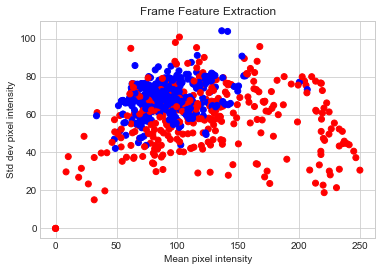

In [82]:
means = x[:,[0]]
stddevs = x[:,[1]]

color = ['blue' if x==0 else 'red' for x in labels]
plt.scatter(means[:1000], stddevs[:1000], c=color[:1000])
plt.title("Frame Feature Extraction")
plt.xlabel("Mean pixel intensity")
plt.ylabel("Std dev pixel intensity")
plt.show()

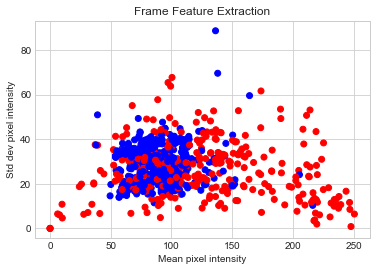

In [83]:
means = x[:,[2]] # Red
stddevs = x[:,[5]]

color = ['blue' if x==0 else 'red' for x in labels]
plt.scatter(means[:1000], stddevs[:1000], c=color[:1000])
plt.title("Frame Feature Extraction")
plt.xlabel("Mean pixel intensity")
plt.ylabel("Std dev pixel intensity")
plt.show()

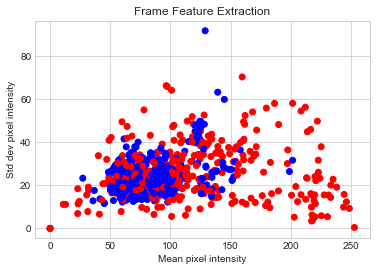

In [84]:
means = x[:,[3]] # Green
stddevs = x[:,[6]]

color = ['blue' if x==0 else 'red' for x in labels]
plt.scatter(means[:1000], stddevs[:1000], c=color[:1000])
plt.title("Frame Feature Extraction")
plt.xlabel("Mean pixel intensity")
plt.ylabel("Std dev pixel intensity")
plt.show()

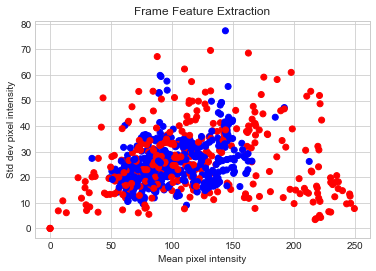

In [85]:
means = x[:,[4]]
stddevs = x[:,[7]]

color = ['blue' if x==0 else 'red' for x in labels]
plt.scatter(means[:1000], stddevs[:1000], c=color[:1000])
plt.title("Frame Feature Extraction")
plt.xlabel("Mean pixel intensity")
plt.ylabel("Std dev pixel intensity")
plt.show()